In [ ]:
"""
Purpose: To Inspect the Neurons that were really bad

"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-04-24 17:38:17,395 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 17:38:17,396 - settings - Setting database.user to celiib
INFO - 2021-04-24 17:38:17,397 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 17:38:17,401 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-24 17:38:17,402 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 17:38:17,414 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-24 17:38:17,803 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 17:38:17,807 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 17:38:17,808 - settings - Setting database.user to celiib
INFO - 2021-04-24 17:38:17,809 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 17:38:17,810 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 17:38:17,811 - settings - Setting database.user to celiib
INFO - 2021-04-24 17:38:17,812 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 17:38:17,814 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 17:38:18,224 - settings - Setting enable_python_native_blobs to True


In [3]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-04-24 17:38:18,371 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 17:38:18,373 - settings - Setting database.user to celiib
INFO - 2021-04-24 17:38:18,373 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 17:38:18,375 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 17:38:18,860 - settings - Setting enable_python_native_blobs to True


In [4]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import time
import system_utils as su

# Downloading the Neuron

In [7]:
seg_id = 864691135866394390

In [8]:
#1) Dwonload the neuron object
neuron_obj = du.fetch_neuron_obj_manual(seg_id,
                                   border_validation=True)

Decompressing Neuron in minimal output mode...please wait


In [ ]:
(filt_neuron,
 return_synapse_df_revised,
return_validation_df_revised) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                    filter_list = pru.v4_exc_filters(),
                    plot_limb_branch_filter_with_disconnect_effect = False,
                    verbose = True,
                    plot_score=False)

vu.synapse_validation_df_to_score_plot(return_validation_df_revised)


--- Working on filter 0:
function = axon_on_dendrite_merges
function __name__ = filter_away_axon_on_dendrite_merges
function arguments = {'use_pre_existing_axon_labels': True}



--- Working on filter 1:
function = high_degree_branching
function __name__ = filter_away_high_degree_branching
function arguments = {'offset': 1500, 'comparison_distance': 2000, 'worst_case_match_threshold': 65, 'width_diff_max': 60, 'match_threshold': 45, 'angle_buffer': 15, 'max_degree_to_resolve': 6, 'match_method': 'best_match'}




 ----- Working on coordinate [1169053.   553487.8  981425.8]--------
coordinate [1169053.   553487.8  981425.8] had error branches [65 47]--------


 ----- Working on coordinate [1173955.86270029  442756.23296947 1021484.03436415]--------
coordinate [1173955.86270029  442756.23296947 1021484.03436415] had error branches [93 91]--------


 ----- Working on coordinate [1192234.27110897  643883.56195061  940473.45718232]--------
coordinate [1192234.27110897  643883.56195061  940

limb_branch_dict_to_cancel = {'L1': [114]}

--- Working on filter 4:
function = axon_fork_divergence
function __name__ = filter_away_small_axon_fork_divergence
function arguments = {'divergence_threshold_mean': 165}


limb_branch_dict_to_cancel = {}



 ---- Total time for applying filter: 238.0025041103363 -----

--- Finished Part 1: Filtering Neuron -----
Apply the presyn non_error
For presyn: # valid synapses = 314, # error synapses  = 524, # error presyns = 19
For postsyn: # valid synapses = 9296, # error synapses  = 15, # error presyns = 0

--- Finished Part 2: Filtering Synapses -----
Synapsse Results:
Total Number of Synapses = 10149
n_valid_syn_ids_presyn = 314
n_errored_syn_ids_presyn = 524
n_valid_syn_ids_postsyn = 9296
n_errored_syn_ids_postsyn = 15


'L1'


 Working on visualization type: mesh


nrows = 4
n-ncols*nrows = -4


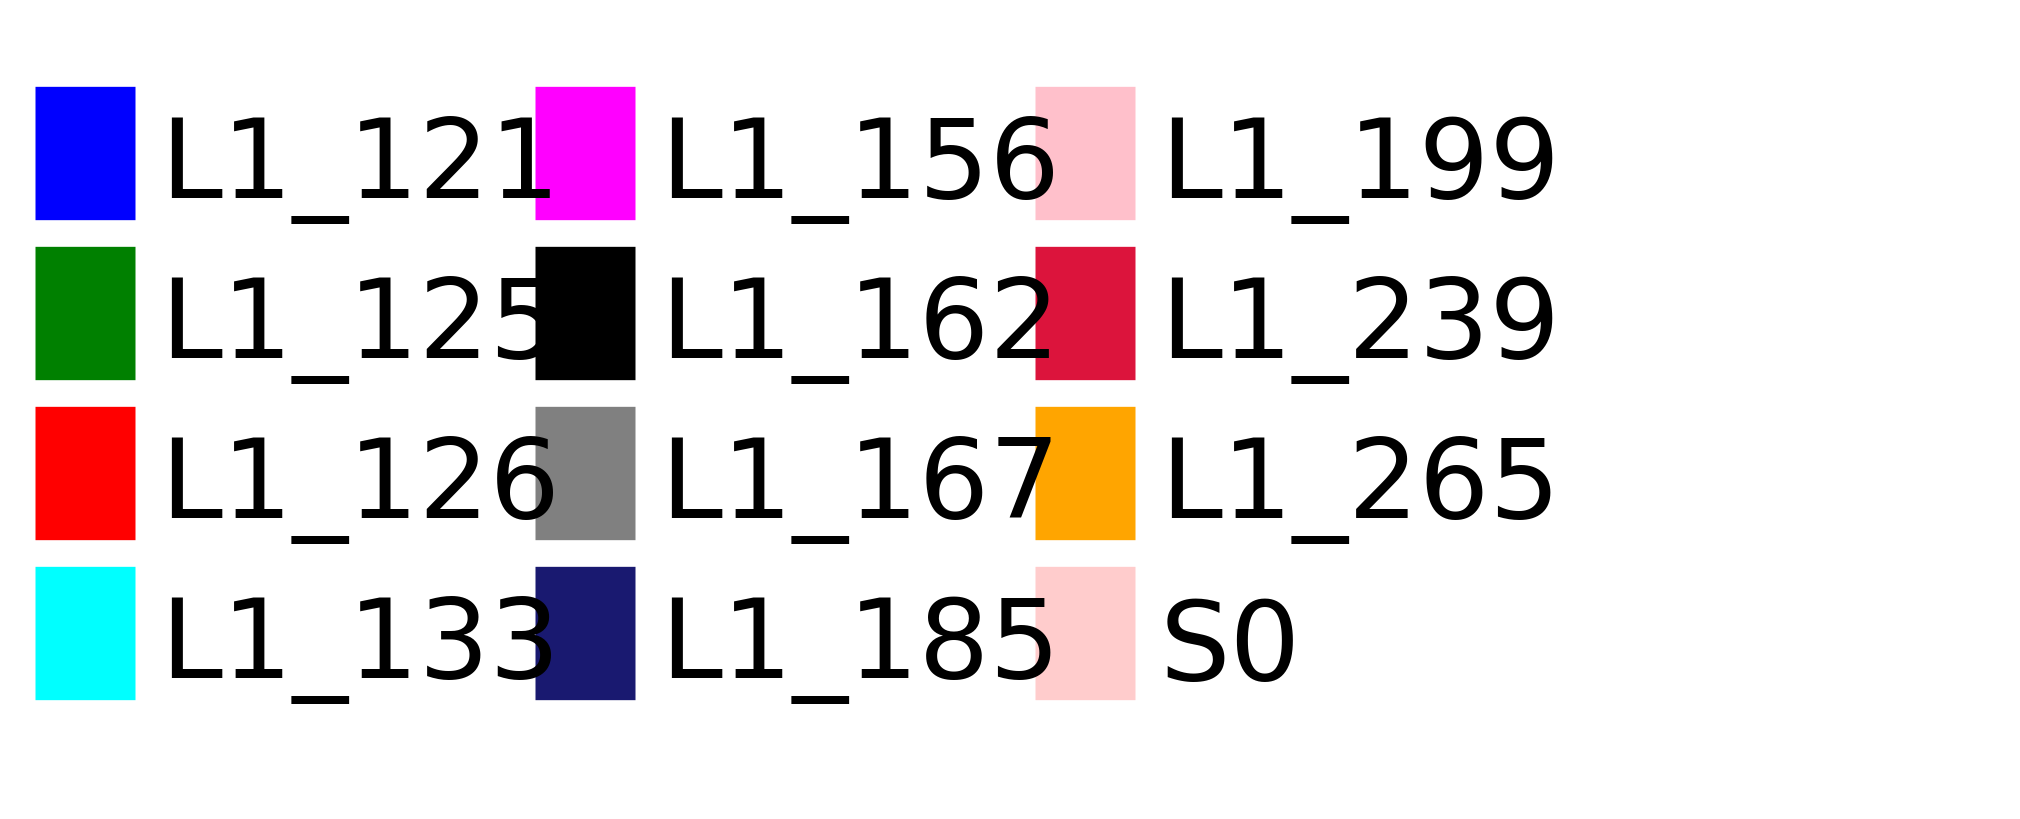

In [19]:
import neuron_searching as ns
thick_ax_limb_branch = ns.query_neuron(neuron_obj,
               functions_list=["axon_width","skeletal_length"],
               query="(axon_width > 160) and (skeletal_length > 20000)",
               limbs_to_process=[neuron_obj.axon_limb_name])
nviz.plot_limb_branch_dict(neuron_obj,
                     thick_ax_limb_branch,
                          plot_random_color_map=True)

In [20]:
nviz.plot_branch_on_whole_mesh(neuron_obj,
                              limb_idx = 1,
                              branch_idx = 125)


 Working on visualization type: mesh


In [21]:
import networkx_utils as xu
xu.downstream_nodes(neuron_obj[1].concept_network_directional,125)

array([119, 124, 126])

In [27]:
xu.sibling_nodes(neuron_obj[1].concept_network_directional,119)

array([124, 126])

In [34]:
import error_detection as ed
coordinate = nru.shared_skeleton_endpoints_for_connected_branches(neuron_obj[1],125, 124)

import numpy_utils as nu
ed.high_degree_upstream_match(
    limb_obj = neuron_obj[1],
    coordinate = coordinate,
#     upstream_branch = 328,
#     downstream_branches = np.array([330, 331, 333]),

    #arguments for the angle checking
    offset=1500,
    comparison_distance = 2000,
    worst_case_match_threshold = 65,
    plot_intermediates = True,
    plot_match_intermediates = True,

    #args for width matching
    width_diff_max = np.inf,#100,

    #args for definite pairs
    match_threshold = 45,
    angle_buffer = 15,
    
    max_degree_to_resolve = 6,
    axon_dependent = True,

    #args for picking the final winner
    match_method = "best_match", #other option is "best_match"
    verbose = True
    )

For test node 119, sibling nodes were: [124 126]
overlap = [124 126]
With test node equal to the downstream node
upstream = 125, downstream_nodes = [124 126 119]
branches_at_coord = [119 124 125 126]
widths_in_branches = [ 95.60497928 101.78531012 303.89874571 264.62937564]
coordinate_branches = [119, 124, 125, 126]
119 = red
124 = aqua
125 = purple
126 = green


Angle between 119 and 124 = 107.27 
Angle between 119 and 125 = 9.42 
Angle between 119 and 126 = 130.82 
Angle between 124 and 125 = 72.68 
Angle between 124 and 126 = 67.02 
Angle between 125 and 126 = 44.39 
Final Matches = [[119, 125], [125, 126]], Final Matches Angle = [9.42, 44.39]
Aligned Skeleton Parts


matched_edges = [[119, 125], [125, 126]]matched_edges_angles = [9.42, 44.39]
Step 2: Edges with worst case scenario matching = 65
Remaining Edges = [(119, 125), (125, 126)], Remaining Nodes = [119, 124, 125, 126]
edges_to_remove_by_width = []
Step 2: Edges after widht mismatch
Remaining Edges = [(119, 125), (125, 126)], Remaining Nodes = [119, 124, 125, 126]
--Working on edge [119 125]--
Edge [119 125] is matches definite match threshold with: 
Edge Buffer of 34.97 (angle_buffer = 15)
Edge Angle of 9.42 (match_threshold = 45)
--Working on edge [125 126]--
Step 4: Definite Edges
Remaining Edges = [(119, 125)], Remaining Nodes = [119, 124, 125, 126]
upstream_subgraph = [125 119]
Possible Connections = [119], angles = [9.42]
Deleting the following nodes because above match threshold while 1 are: []
Step 5: Removing worst case edges
Remaining Edges = [(119, 125)]
Using best match method
for upstream node 125, winning_node = 119, error_branches = [124 126]


(119, array([124, 126]))

In [23]:
[k for k in dir(nru) if "shared" in k]

['shared_skeleton_endpoints_for_connected_branches']

limb_name = L1

 Working on visualization type: mesh

 Working on visualization type: skeleton


No limb name was given so using L1 because was the limb in the first key


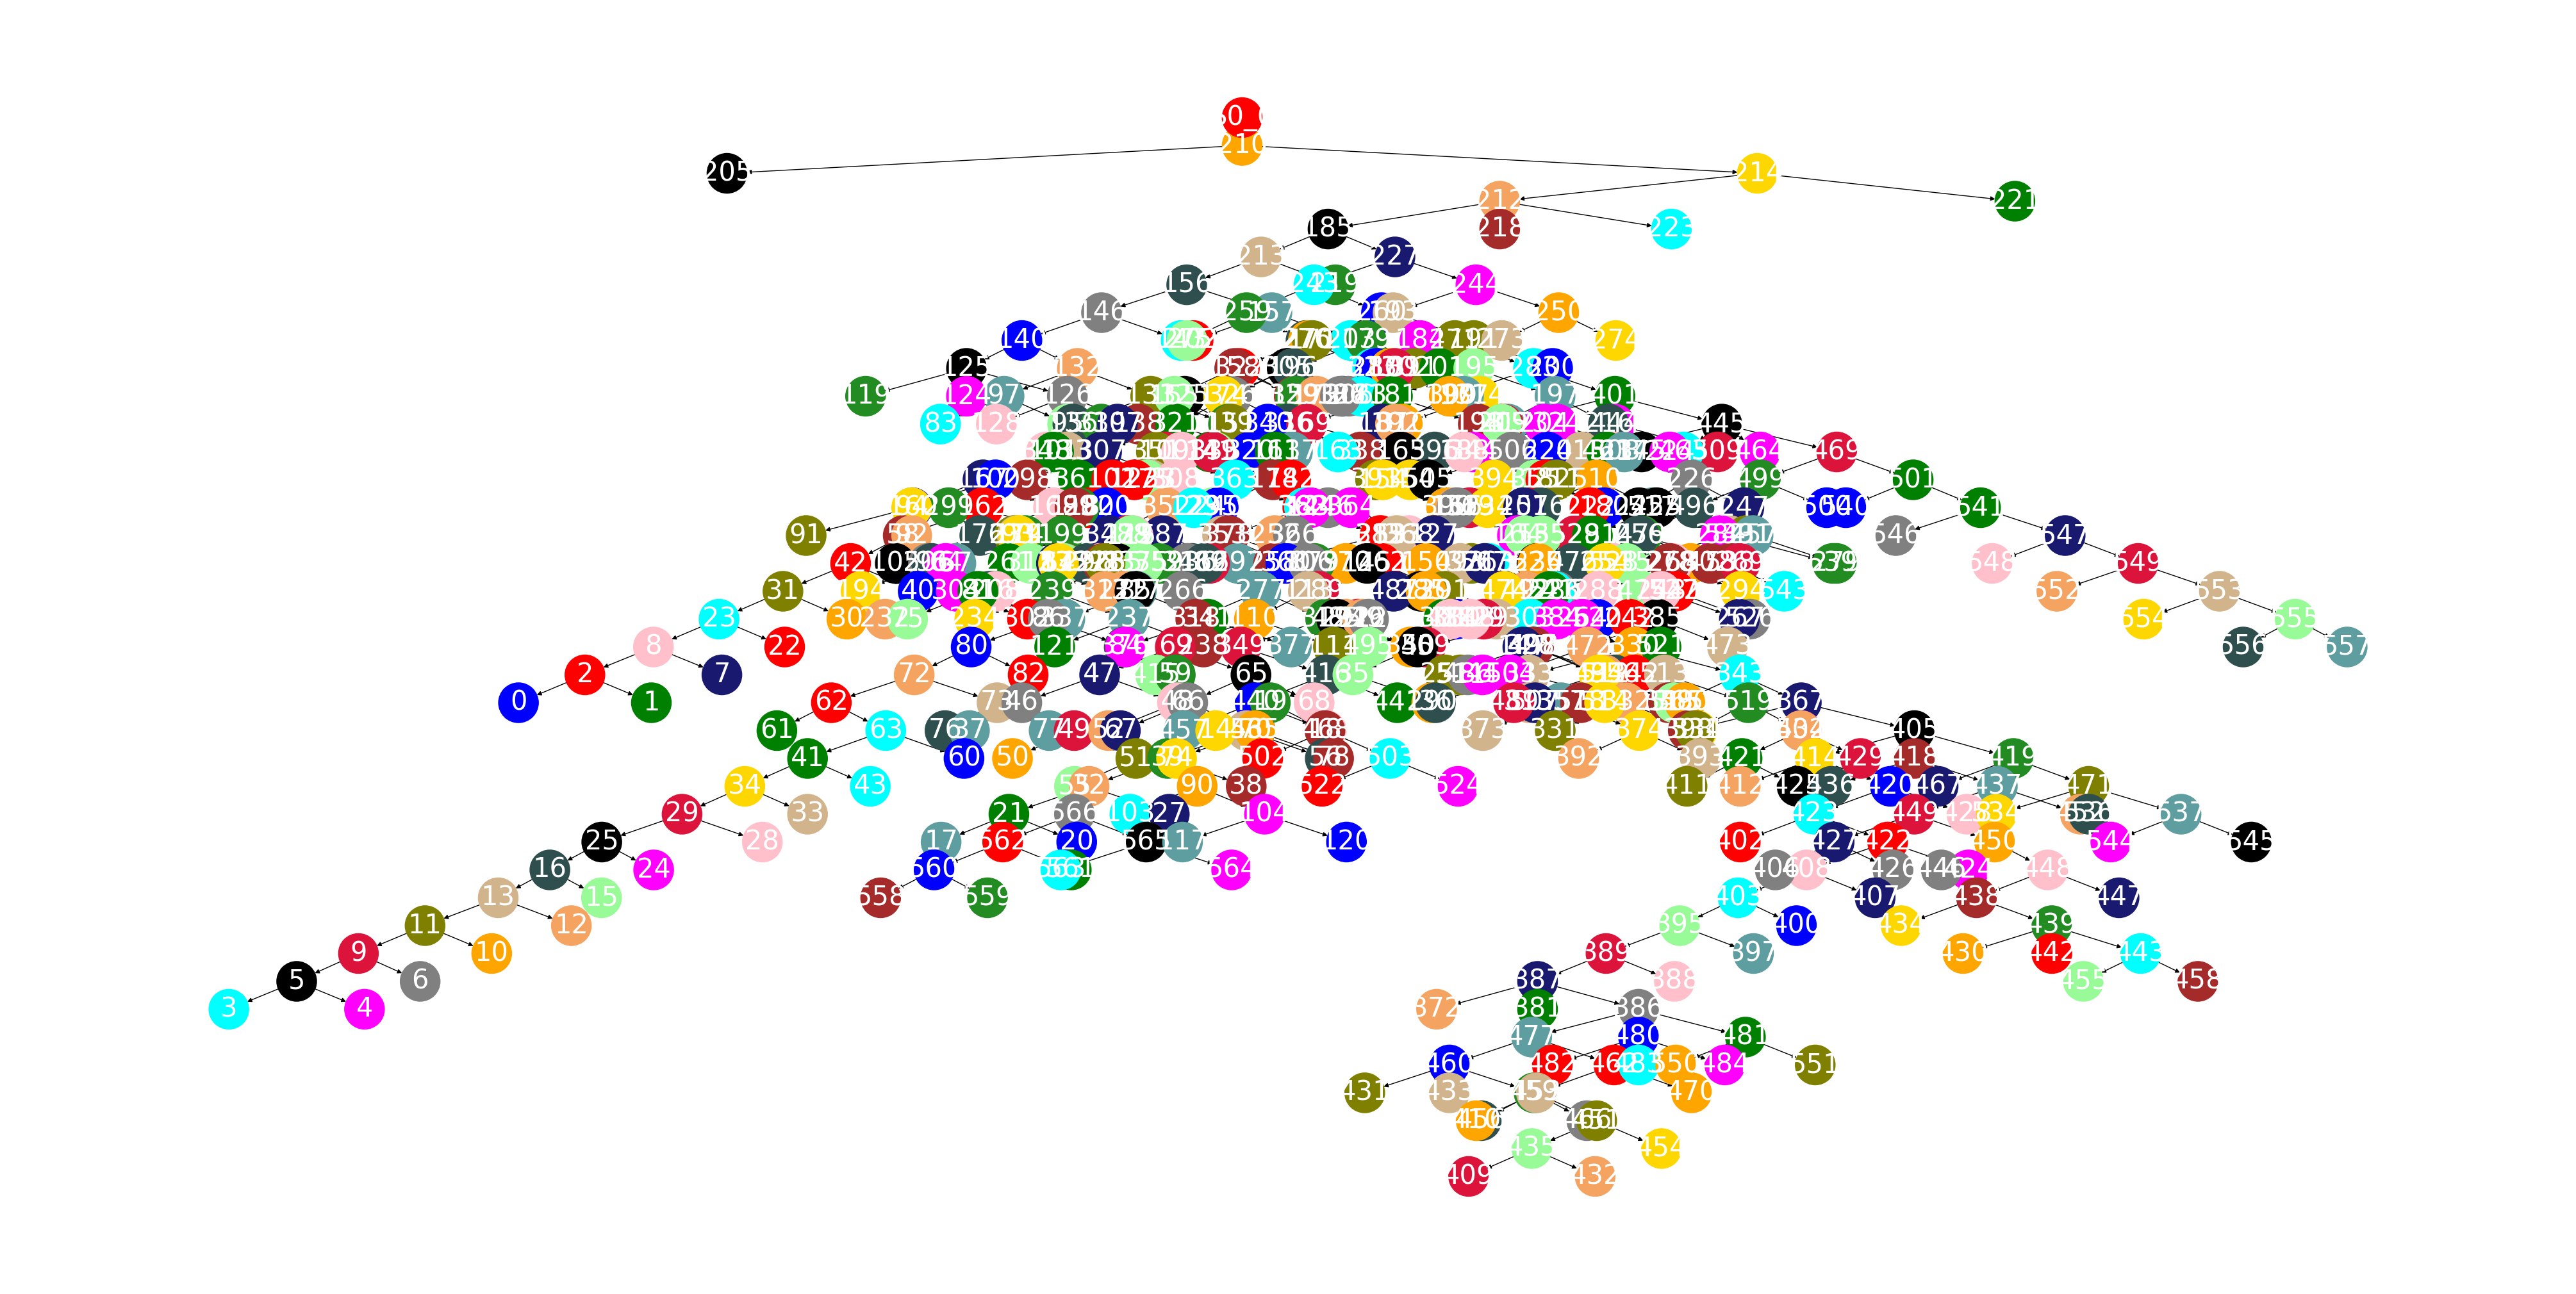

In [11]:
nviz.visualize_neuron_specific_limb(neuron_obj,
                                   "axon")

In [10]:
vu.plot_validation_synapses(seg_id,
                            validation_df = return_validation_df_revised,
                             synapse_dict = None,
                             synapses_type_to_plot = None,
                             synapses_type_to_not_plot = None,
                             verbose=False,
                             synapse_type = "presyn",
                             TP_color="yellow",
                            TN_color="aqua",
                            FP_color="black",
                            FN_color="orange",
                             synapse_scatter_size = 0.15,
                             
                             #for plotting the actual mesh parts to go along
                             
                             neuron_obj = filt_neuron,
                             plot_only_axon_skeleton = True,
                             error_mesh_color = "red",
                             valid_mesh_color = "green",
                             valid_skeleton_color = "black",
                             mesh_alpha = 0.3,)

Using the mesh from the neuron object


TP:yellow
TN:aqua
FP:black
FN:orange
